# Logistic Regression
- Implementing LR using
    - Gradient Descent
    - Stochastic Gradient Descent
- Using sklearn.linear_model-> LogisticRegression & SGDCClassifer
- Using sklearn.metrics -> confusion_matrix

## Week 4: UCSD Machine Learning Fundamentals

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.manifold import Isomap
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import datasets, linear_model

In [2]:
def confusion_matix_display(y_actual, y_predicted, labels):
    cm = confusion_matrix(y_true=y_actual, y_pred=y_predicted, labels=labels)
    disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=labels
    )
    disp.plot()
    plt.show()

In [3]:
X, y = datasets.make_classification(n_features=8, scale=10)
y

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [4]:
# %%timeit -r 1 -n 0
# include b in the w so instead of w.x + b it is w.x
# w.x = woxo+w1x1+w2x2..... wdxd
# wo is b & x0 = 1 in d rows 1 column.
# so insert 1 column wise at location 0
X = np.random.normal(size=400, loc=0, scale=10).reshape(100, 4)
X = np.insert(X, 0, np.ones(len(X)), axis=1)

# first element is the intercept & remaining are the weights
w_actual = np.array([5, 4, 3, 2, 1])

y = np.where(expit(np.dot(w_actual, X.T))>=0.5, 1, 0)
y

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [5]:
class LogisticRegression_GD():
    def __init__(self, eta=0.01, maxiter=300, precision=0.001):
        self.eta = eta
        self.precision = precision
        self.maxiter = maxiter
    def fit(self, X, y):
        self.w = np.zeros((X.shape[1], ))
        precision = np.full((X.shape[1], 1), self.precision)
        diff = 1
        self.iteration = 0
        self.errors = []
        while((diff > precision).any() and self.iteration < self.maxiter):
            w_previous = self.w
            der_temp = 0
            x1 = X[range(50)]
            y1 = y[range(50)]
            self.w = self.w + self.eta * x1.T.dot((expit(-y1 * self.w.dot(x1.T))) * y1)

            # for x1, y1 in zip(x[range(7)], y[range(7)]):
            #     der_temp += - expit(-y1* np.dot(w, x1)) * x1 * y1
            # w = w - der_temp
            
            self.iteration += 1
            diff = abs(w_previous - self.w)
            self.errors.append(diff)

        self.errors = np.array(self.errors)
        return self

Total number of iterations: 300


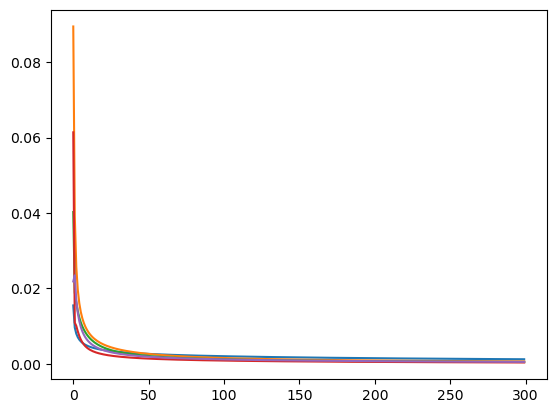

In [6]:
lrgd = LogisticRegression_GD(eta=0.001)
lrgd.fit(X, y)
print(f'Total number of iterations: {lrgd.iteration}')
plt.plot(range(lrgd.iteration), lrgd.errors)
plt.show()


In [7]:
# in prediction we are not using y in the sigmoid function, note the difference between this & next cell
y_predicted = np.where(expit(np.dot(lrgd.w, X[range(50, 100)].T)) >= 0.5, 1, 0)
# y_predicted

In [8]:
score = 1- np.sum(y_predicted!=y[range(50,100)])/len(y_predicted)
score

0.98

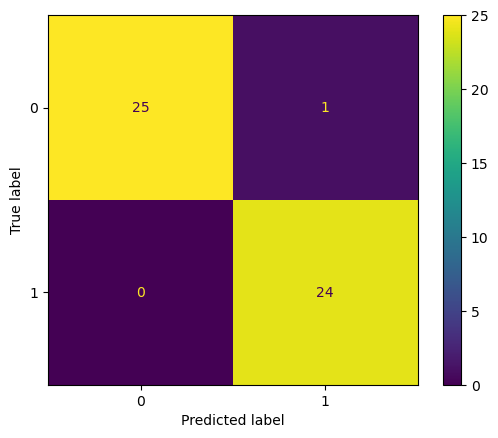

In [9]:
confusion_matix_display(y[range(50,100)], y_predicted, np.array([0, 1]))

In [10]:
class LogisticRegression_SGD():
    def __init__(self, eta=0.01, maxiter=300, precision=0.001):
        self.eta = eta
        self.precision = precision
        self.maxiter = maxiter
    def fit(self, X, y):
        # Stochastic Gradient Descent
        self.w = np.zeros((X.shape[1], ))
        precision = np.full((X.shape[1], 1), self.precision)
        diff = 1
        self.iteration = 0
        self.errors = []
        while((diff > precision).any() and self.iteration < self.maxiter):
            i = np.random.permutation(50)
            w_previous = self.w
            for x1, y1 in zip(X[i], y[i]):
                self.w = self.w + self.eta * expit(-y1* np.dot(self.w, x1)) * x1 * y1
            self.iteration += 1
            diff = abs(w_previous - self.w)
            self.errors.append(diff)

        self.errors = np.array(self.errors)
        return self

Total number of iterations: 300


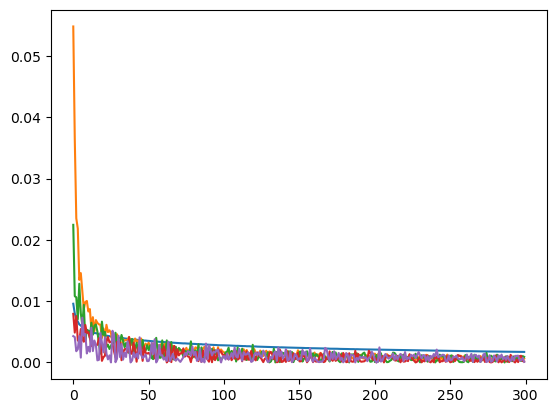

In [11]:
lrsgd = LogisticRegression_SGD(eta=0.001)
lrsgd.fit(X, y)
print(f'Total number of iterations: {lrsgd.iteration}')
plt.plot(range(lrsgd.iteration), lrsgd.errors)
plt.show()

In [12]:
lrsgd.w

array([0.81908876, 0.70285391, 0.46608288, 0.31532706, 0.17394985])

In [ ]:
# in prediction we are not using y in the sigmoid function, note the difference between this & next cell
y_predicted = np.where(expit(np.dot(lrsgd.w, X[range(50, 100)].T)) >= 0.5, 1, 0)
# y_predicted

In [ ]:
score = 1- np.sum(y_predicted!=y[range(50,100)])/len(y_predicted)
score

In [ ]:
confusion_matix_display(y[range(50,100)], y_predicted, np.array([0, 1]))

In [ ]:
 # probability that y is +1 or -1 using sigmoid function, 
    
# Testing for data (+1 or -1) at indicies y[[50, 51, 52,...... 99]] based on parameter w estimated from training data indicies of x & y [[0, 1, 2, 3.... 49]] using GD or SGD..
for i in range (50, 100):
   # probability that y=+1 or -1, here we know the value of y from test data.
    print(f'P(y = {y[i]}|X) is {expit(y[i] * np.dot(w, X[i]))*100:0.2f}%')

In [ ]:
sgd = SGDClassifier(loss='log_loss', eta0=0.01)
sgd.fit(X[range(50)], y[range(50)])
y_predicted = sgd.predict(X[range(50, 100)])
print(sgd.classes_, sgd.coef_, sgd.score(X[range(50, 100)], y[range(50, 100)]))
confusion_matix_display(y[range(50,100)], y_predicted, np.array([0, 1]))

In [ ]:
lr = LogisticRegression()
lr.fit(X[range(50)], y[range(50)])
y_predicted = lr.predict(X[range(50, 100)])
print(y_predicted)

In [ ]:
lr.classes_, lr.coef_, lr.score(X[range(50, 100)], y[range(50, 100)])

In [ ]:
confusion_matix_display(y[range(50,100)], y_predicted, np.array([0, 1]))

In [ ]:
iso = Isomap(n_components=2)

In [ ]:
iso.fit(X)

In [ ]:
data_projected = iso.transform(X)
data_projected.shape

In [ ]:
color_code = np.where(y==1, 'blue', 'black')

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=color_code,
            edgecolor='none', alpha=0.5)
plt.clim(-0.5, 9.5);